In [130]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Reshape, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import itertools
import os
import random
import numpy as np
import tensorflow as tf
%matplotlib inline

In [131]:
def plotImages(images_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [132]:
train_path='C:\\Users\\ajayk\\Desktop\\ImageProcessing\\Banana Leaf Disease Detection\\archive\\train'
valid_path='C:\\Users\\ajayk\\Desktop\\ImageProcessing\\Banana Leaf Disease Detection\\archive\\val'
test_path='C:\\Users\\ajayk\\Desktop\\ImageProcessing\\Banana Leaf Disease Detection\\archive\\test'

In [133]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(256,256),classes=['cordana','healthy','pestalotiopsis','sigatoka'],batch_size=10)
val_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input) \
    .flow_from_directory(directory=valid_path,target_size=(256,256),classes=['cordana','healthy','pestalotiopsis','sigatoka'],batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(256,256),classes=['cordana','healthy','pestalotiopsis','sigatoka'],batch_size=10,shuffle=False)


Found 777 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [134]:
#data_augmentation=tf.keras.Sequential(tf.keras.layers.experimental.preprocessing.RandomRotation(0.3))

In [135]:
model=Sequential([#data_augmentation,
                  Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
                  MaxPooling2D(pool_size=(2,2)),
                  Flatten(),
                  Dense(units=4,activation='softmax')
])

In [136]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_92 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_94 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 32, 32, 64)     

In [137]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [138]:
model.fit(x=train_batches, validation_data=val_batches,epochs=15)

Epoch 1/15
18/78 [=====>........................] - ETA: 2:09 - loss: 1.2265 - accuracy: 0.5667

C:\Users\ajayk\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\ajayk\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:811: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


78/78 [==============================] - 175s 2s/step - loss: 1.0723 - accuracy: 0.5920 - val_loss: 1.3672 - val_accuracy: 0.4500
Epoch 2/15
78/78 [==============================] - 172s 2s/step - loss: 0.8786 - accuracy: 0.6692 - val_loss: 1.0860 - val_accuracy: 0.5750
Epoch 3/15
78/78 [==============================] - 171s 2s/step - loss: 0.6979 - accuracy: 0.7490 - val_loss: 0.8622 - val_accuracy: 0.6250
Epoch 4/15
78/78 [==============================] - 171s 2s/step - loss: 0.5121 - accuracy: 0.8147 - val_loss: 0.9397 - val_accuracy: 0.5750
Epoch 5/15
78/78 [==============================] - 170s 2s/step - loss: 0.3901 - accuracy: 0.8610 - val_loss: 0.7571 - val_accuracy: 0.7250
Epoch 6/15
78/78 [==============================] - 171s 2s/step - loss: 0.3325 - accuracy: 0.8752 - val_loss: 0.6116 - val_accuracy: 0.8250
Epoch 7/15
78/78 [==============================] - 168s 2s/step - loss: 0.2776 - accuracy: 0.8945 - val_loss: 0.5142 - val_accuracy: 0.7875
Epoch 8/15
78/78 [======

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

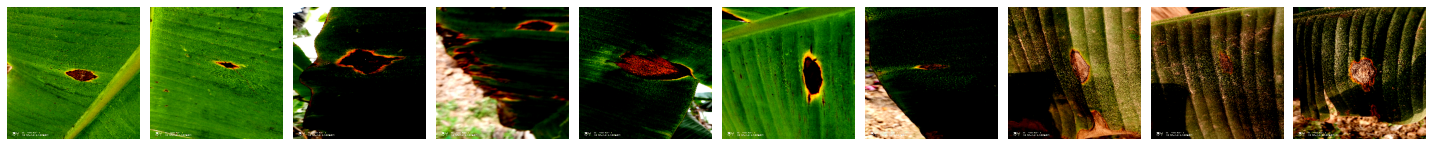

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [139]:
test_imgs,test_labels=next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [140]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [141]:
predictions=model.predict(x=test_batches, verbose=0)

In [142]:
np.round(predictions)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],


In [143]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [144]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [145]:
test_batches.class_indices

{'cordana': 0, 'healthy': 1, 'pestalotiopsis': 2, 'sigatoka': 3}

Confusion matrix, without normalization
[[14  0  4  2]
 [ 0 18  2  0]
 [ 0  1 16  3]
 [ 1  0  0 19]]


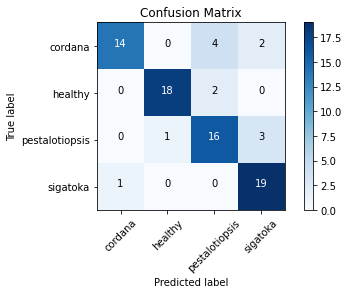

In [146]:
cm_plot_labels = ['cordana','healthy','pestalotiopsis','sigatoka']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')